<a href="https://colab.research.google.com/github/Veckey5/Veckey5/blob/main/ACUTRO_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACUTRO - DATA ENGINEER COMPETENCY TEST**

**PART A: DATA VISUALIZATION AND ANALYSIS**

From the CSV file provided, the following observations were made:
1. There are three attributes namely time stamp, location and temperature (in Celsius)
2. The expected temperature threshold to be reached weekly is 55 degrees Celsius.
3. Data points are obtained at no specific time interval.
4. The time stamp includes the time, day, month and year data was received.
5. There is more than one location and they are: FF Staff Room, GF Ladies WC, GF Treatment Room 4 and FF Doctors Room.

STEP 1: LOAD THE DATA

In [2]:
import pandas as pd
testdata = pd.read_csv('hot-water-pipe-temperature.csv')
testdata.head(100)

STEP 2: HANDLING MISSING DATA

In [4]:
missing_data = testdata.isnull().sum()
print(missing_data)

Timestamp    0
Location     0
Value        0
dtype: int64


From the above, we can see that there are no missing values in the dataset.

STEP 3: DATA TYPE CHECK

This step ensures that the data type here is truly timestamp as it would make the task easier to compute.

In [5]:
# Converts the Timestamp attribute to timestamp (for emphasis)
testdata['Timestamp'] = pd.to_datetime(testdata['Timestamp'])


Step 4: DATA EXPLORATION

Though not required, I have decided to compute the statistics of the dataset to have an idea of the mean, median, quartiles and the standard deviation of the data.

In [7]:
statistics = testdata.describe()
print(statistics)

             Value
count  5919.000000
mean     22.322703
std       7.138920
min      14.750000
25%      18.810000
50%      20.430000
75%      22.430000
max      65.560000


TASK: Plot the data to easily identify if the health and safety check (values > 55 for at least one measurement) is met every week.

STEP 1: Grouping the testdata by location and week

In [14]:
# Group by location and week
grouped_testdata = testdata.groupby(['Location', testdata['Timestamp'].dt.strftime('%U')])

# Here, .dt.strftime('%U') has been used to extract the week number of the year for a particular timestamp from the datetime object and weeks start from Sunday.

# Display the first 100 rows of the grouped testdata
print(grouped_testdata.head())


               Timestamp          Location  Value
0    2019-09-18 09:24:00  FF Doctors Room   14.75
1    2019-09-18 08:24:00  FF Doctors Room   14.81
2    2019-09-18 10:24:00  FF Doctors Room   14.87
3    2019-09-18 07:24:00  FF Doctors Room   14.87
4    2019-09-18 06:24:00  FF Doctors Room   15.06
...                  ...               ...    ...
5525 2019-06-08 09:22:00    FF Staff Room   22.75
5557 2019-06-08 10:22:00    FF Staff Room   22.87
5577 2019-06-08 11:22:00    FF Staff Room   23.00
5592 2019-06-08 08:22:00    FF Staff Room   23.06
5599 2019-06-08 15:22:00    FF Staff Room   23.12

[380 rows x 3 columns]


STEP 2: Check to know if the temperature measurement requirement is satisfied or met (> 55°C)

In [17]:
health_safety_check = grouped_testdata['Value'].apply(lambda x: (x > 55).any()).unstack(fill_value=False)

# Display the health_safety_check
print(health_safety_check)

Timestamp                01     05     09     14     18     22     23     27  \
Location                                                                       
FF Doctors Room       False  False  False  False  False  False  False  False   
FF Staff Room         False  False  False  False  False  False  False  False   
GF Ladies WC           True  False  False  False  False  False  False  False   
GF Treatment Room 4   False   True  False  False  False  False  False  False   

Timestamp                30     31     32     33     34     36     37     38  \
Location                                                                       
FF Doctors Room       False  False  False   True  False  False   True  False   
FF Staff Room         False  False  False  False  False  False  False  False   
GF Ladies WC          False   True   True   True   True   True   True  False   
GF Treatment Room 4   False  False  False   True  False  False   True   True   

Timestamp                40     44    

From the result above, True and False have been used. True is used if a particular location in a particular week meets the requirement and False if otherwise.

STEP 3: Having set the rule, the next step is to visualize the result.
Different graphs can be used for this such as the bar chart, heatmap, scatter plot and line chart
I have chosen to use the stacked bar chart because:

a. it gives a clearer and more interpretable view.

b. I can use color-coding to show if requirements are met or not.

c. I can easily analyse the compliance trends of the temperature

In [15]:
import matplotlib.pyplot as plt


STEP 4: Extract the number of True and False values from each location and week from the health_safety_check function above

In [18]:
met = health_safety_check[health_safety_check == True].count(axis=1)
not_met = health_safety_check[health_safety_check == False].count(axis=1)

STEP 5: Plot the Stacked bar chart

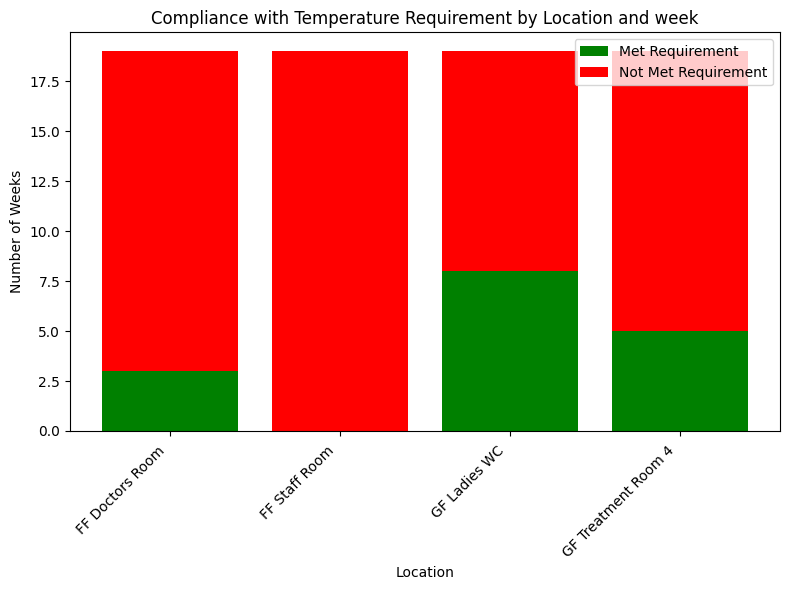

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(health_safety_check.index, met, label='Met Requirement', color='green')
plt.bar(health_safety_check.index, not_met, bottom=met, label='Not Met Requirement', color='red')
plt.xlabel('Location')
plt.ylabel('Number of Weeks')
plt.title('Compliance with Temperature Requirement by Location and week')
plt.legend()
# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**ANALYSIS**

From the graph above, the following deductions can be made;

1. Not all locations met the requirement because the 'FF Staff Room' location did not even once.

2. The 'GF Ladies WC' location had the highest rayte of compliance as this location met the required temeperature for at least once in a week for over 7.5 weeks.

3. If ranked in descending order, the locations that complied to this requirement are:

a. GF Ladies WC

b. GF Treatment Room 4

c. FF Doctors Room

Thus, more analysis can be doen to figure out why the 'FF Staff Room' does not meet the requirement at all and to find ways to optimize the performance of other locations and ensure they meet the requirements for more weeks.